In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [4]:
def get_data(filename):
    with open(filename) as training_file:
        data = csv.reader(training_file, delimiter=',')
        first_row = True
        temp_img = []
        temp_label = []
        for row in data:
            if first_row:
                first_row = False
            else:
                temp_label.append(row[0])
                img_data = row[1:785]
                img_array = np.array_split(img_data, 28)
                temp_img.append(img_array)
        images = np.array(temp_img).astype('float')
        labels = np.array(temp_label).astype('float')
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, 
                                                 training_labels, 
                                                 batch_size=32),                               
                              steps_per_epoch=len(training_images)/32, 
                              epochs=2,
                              validation_data = validation_datagen.flow(testing_images, 
                                                                        testing_labels, 
                                                                        batch_size=32),
                              validation_steps=len(testing_images)/32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
858/857 [==============================] - 51s 59ms/step - loss: 2.5488 - accuracy: 0.2156 - val_loss: 1.4743 - val_accuracy: 0.5194
Epoch 2/2
858/857 [==============================] - 50s 58ms/step - loss: 1.5862 - accuracy: 0.4877 - val_loss: 0.8710 - val_accuracy: 0.6942


[153.14175923949037, 0.52607363]

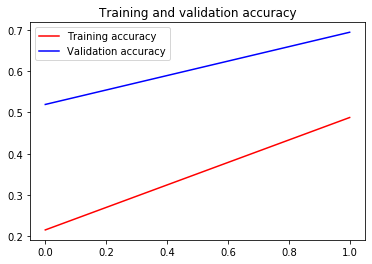

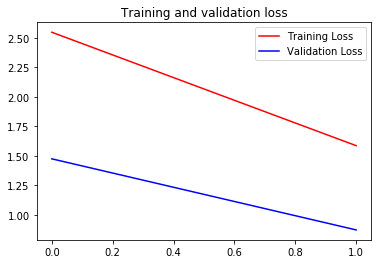

In [22]:
# accuracy and loss
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()